In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fastai import *
from fastai.vision import *

%matplotlib inline

In [2]:
path = "../data/train/train/"
test_df = pd.read_csv("../data/test_WyRytb0.csv")
sample_sub = pd.read_csv("../data/sample_submission_CH2mq5Z.csv")
df = pd.read_csv("../data/train/train.csv")
bs = 8

In [3]:
test_df.head()

,image_name
0,3.jpg
1,5.jpg
2,6.jpg
3,11.jpg
4,14.jpg


In [4]:
sample_sub.head()

,image_name,label
0,3.jpg,0
1,5.jpg,0
2,6.jpg,0
3,11.jpg,0
4,14.jpg,0


In [5]:
df.head()

,image_name,label
0,0.jpg,0
1,1.jpg,4
2,2.jpg,5
3,4.jpg,0
4,7.jpg,4


In [6]:
tfms = get_transforms(flip_vert=False,max_zoom=1.0,max_warp=0.5)

In [7]:
data = (ImageList.from_csv(path, csv_name = '../train.csv') 
        .split_by_rand_pct()              
        .label_from_df()            
        .add_test_folder(test_folder = '../test')              
        .transform(tfms, size=128)
        .databunch(num_workers=0))

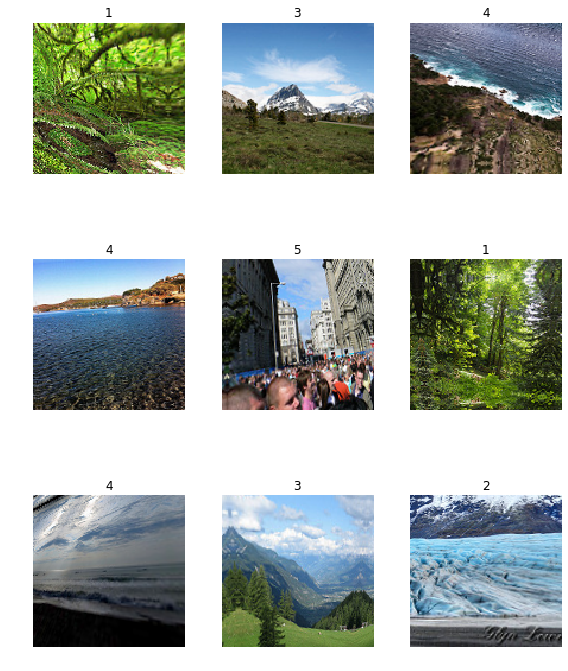

In [8]:
data.show_batch(rows=3, figsize=(8,10))

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy], model_dir="/tmp/model/")

In [ ]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,accuracy,time


In [ ]:
learn.save("../model/last_lay10")